### 01e_graph_centrality_analysis — Analyzing Network Structure

### What this step does
This notebook loads the graph created in `01d` and performs a **centrality analysis**. It calculates several key centrality metrics (Degree, Betweenness, Closeness) to identify the most important or influential nodes in the network. The results are added as attributes to the nodes, visualised, and exported.

### Why this is useful
- Introduces fundamental techniques for quantifying node importance in a network.
- Helps answer questions like: "Which facilities are the most connected?" or "Which nodes are most critical for connecting different parts of the network?"
- Demonstrates how to augment a graph with derived analytics and visualise these new properties.

### Inputs
- `outputs/01d_graph_creation/graph.graphml` (from the previous notebook)

### Outputs
- `outputs/01e_centrality_analysis/graph_with_centrality.graphml`
- `outputs/01e_centrality_analysis/centrality_scores.csv`
- `outputs/01e_centrality_analysis/01e_centrality_visualisation.png`

### Key operations
- Load a graph from a GraphML file.
- Define single-purpose functions to calculate and attach different centrality scores.
- Use `networkx.degree_centrality`, `networkx.betweenness_centrality`, and `networkx.closeness_centrality`.
- Store the calculated scores as new node attributes.
- Create a visualisation where node size is proportional to its betweenness centrality.
- Export the augmented graph and a summary CSV of the scores.

In [1]:
# --- Step 0: Imports and Configuration ---
# 203 # This cell sets up the environment by importing necessary libraries and
# 203 # defining the configuration. It follows the established pattern of using
# 203 # pathlib.Path for file handling and a dataclass for configuration to ensure
# 203 # that all paths are managed cleanly and relative to the project structure.

from __future__ import annotations

from dataclasses import dataclass
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# 203 # Display preferences for better DataFrame output.
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)
pd.set_option("display.float_format", "{:.4f}".format)

@dataclass(frozen=True)
class Config:
    """Configuration object for file paths and parameters."""
    input_dir: Path
    output_dir: Path
    input_graph_file: Path
    output_graph_file: Path
    scores_file: Path
    viz_file: Path


def setup_config() -> Config:
    """Initialises configuration and creates directories."""
    root_dir = Path(".")
    input_dir = root_dir / "outputs" / "01d_graph_creation"
    output_dir = root_dir / "outputs" / "01e_centrality_analysis"
    
    output_dir.mkdir(parents=True, exist_ok=True)

    return Config(
        input_dir=input_dir,
        output_dir=output_dir,
        input_graph_file=input_dir / "graph.graphml",
        output_graph_file=output_dir / "graph_with_centrality.graphml",
        scores_file=output_dir / "centrality_scores.csv",
        viz_file=output_dir / "01e_centrality_visualisation.png",
    )

cfg = setup_config()

print("--- Configuration Initialised ---")
print(f"Input graph: {cfg.input_graph_file}")
print(f"Outputs will be saved to: {cfg.output_dir}")

--- Configuration Initialised ---
Input graph: outputs/01d_graph_creation/graph.graphml
Outputs will be saved to: outputs/01e_centrality_analysis


In [2]:
# --- Step 1: Load Graph ---
# 203 # This cell loads the graph created in the previous notebook.
# 203 # Reading from GraphML is efficient and preserves all node/edge attributes.
# 203 # A crucial step here is converting the 'pos' attribute back from a
# 203 # string to a tuple, as GraphML does not natively support tuple types.

def load_graph(file_path: Path) -> nx.Graph:
    """Loads a graph from a GraphML file and corrects attribute types."""
    if not file_path.exists():
        raise FileNotFoundError(
            f"Graph file not found at {file_path}.\n"
            f"Please run notebook '01d_graph_creation_and_attributes.ipynb' first."
        )
    G = nx.read_graphml(file_path)
    
    # 203 # SOLVED: GraphML saves tuple attributes (like 'pos') as strings.
    # 203 # We must convert them back to tuples for NetworkX drawing functions to work.
    for node, data in G.nodes(data=True):
        if 'pos' in data and isinstance(data['pos'], str):
            try:
                # 203 # Safely evaluate the string '(x, y)' back into a tuple.
                data['pos'] = eval(data['pos'])
            except (SyntaxError, NameError):
                print(f"Warning: Could not parse pos attribute for node {node}. Defaulting to (0,0).")
                data['pos'] = (0, 0)

    print(f"Graph loaded from {file_path}.")
    print(f"- Nodes: {G.number_of_nodes()}")
    print(f"- Edges: {G.number_of_edges()}")
    return G

# 203 # Execute the graph loading function.
G = load_graph(cfg.input_graph_file)

Graph loaded from outputs/01d_graph_creation/graph.graphml.
- Nodes: 25
- Edges: 37


In [3]:
# --- Step 2: Calculate Centrality Measures ---
# 203 # This cell defines functions to compute various centrality metrics.
# 203 # Each metric gets its own function for clarity. The main orchestrator function,
# 203 # `calculate_and_set_centralities`, calls each of these and attaches the results
# 203 # directly to the graph nodes as attributes.

def calculate_degree_centrality(G: nx.Graph):
    """Calculates degree centrality and sets it as a node attribute."""
    # 203 # Degree centrality measures the number of direct connections a node has.
    centrality = nx.degree_centrality(G)
    nx.set_node_attributes(G, centrality, 'degree_centrality')
    print("Calculated and attached 'degree_centrality'.")

def calculate_betweenness_centrality(G: nx.Graph):
    """Calculates betweenness centrality and sets it as a node attribute."""
    # 203 # Betweenness centrality identifies nodes that act as bridges.
    # 203 # We use 'weight' to consider travel time in the shortest path calculations.
    centrality = nx.betweenness_centrality(G, weight='weight', normalized=True)
    nx.set_node_attributes(G, centrality, 'betweenness_centrality')
    print("Calculated and attached 'betweenness_centrality'.")

def calculate_closeness_centrality(G: nx.Graph):
    """Calculates closeness centrality and sets it as a node attribute."""
    # 203 # Closeness centrality finds nodes that are, on average, closest to all others.
    centrality = nx.closeness_centrality(G, distance='weight')
    nx.set_node_attributes(G, centrality, 'closeness_centrality')
    print("Calculated and attached 'closeness_centrality'.")

def calculate_and_set_centralities(G: nx.Graph):
    """Orchestrates calculation and assignment of all centrality measures."""
    calculate_degree_centrality(G)
    calculate_betweenness_centrality(G)
    calculate_closeness_centrality(G)

# 203 # Execute the main calculation function.
calculate_and_set_centralities(G)

Calculated and attached 'degree_centrality'.
Calculated and attached 'betweenness_centrality'.
Calculated and attached 'closeness_centrality'.


In [4]:
# --- Step 3: Analyze and Export Centrality Scores ---
# 203 # This cell extracts the computed centrality scores from the graph attributes
# 203 # into a pandas DataFrame. This allows for easy sorting, analysis, and
# 203 # exporting to a standard CSV format for reporting or use in other tools.

def get_centrality_df(G: nx.Graph) -> pd.DataFrame:
    """Extracts node attributes into a DataFrame for analysis."""
    # 203 # Convert the graph's node data into a DataFrame.
    # 203 # The `from_dict` method is a convenient way to achieve this.
    df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
    # 203 # Reorder columns for logical presentation.
    cols = [
        'name', 'kind', 'degree_centrality', 
        'betweenness_centrality', 'closeness_centrality'
    ]
    df = df[cols].sort_values(by='betweenness_centrality', ascending=False)
    df.index.name = 'node_id'
    return df

# 203 # Get the DataFrame and display the top 10 most central nodes.
centrality_df = get_centrality_df(G)
print("--- Top 10 Nodes by Betweenness Centrality ---")
print(centrality_df.head(10))

# 203 # Save the full DataFrame to a CSV file.
centrality_df.to_csv(cfg.scores_file)
print(f"\nCentrality scores saved to {cfg.scores_file}")

--- Top 10 Nodes by Betweenness Centrality ---
                  name       kind  degree_centrality  betweenness_centrality  closeness_centrality
node_id                                                                                           
N014        Clinic-014     Clinic             0.3333                  0.2572                0.0184
N015        Clinic-015     Clinic             0.1667                  0.2319                0.0183
N016        Clinic-016     Clinic             0.2083                  0.1812                0.0158
N017      Hospital-017   Hospital             0.1250                  0.1449                0.0148
N003        Clinic-003     Clinic             0.1667                  0.1159                0.0167
N005     Warehouse-005  Warehouse             0.1667                  0.1159                0.0146
N001        Clinic-001     Clinic             0.1667                  0.0978                0.0162
N006     Warehouse-006  Warehouse             0.1250          

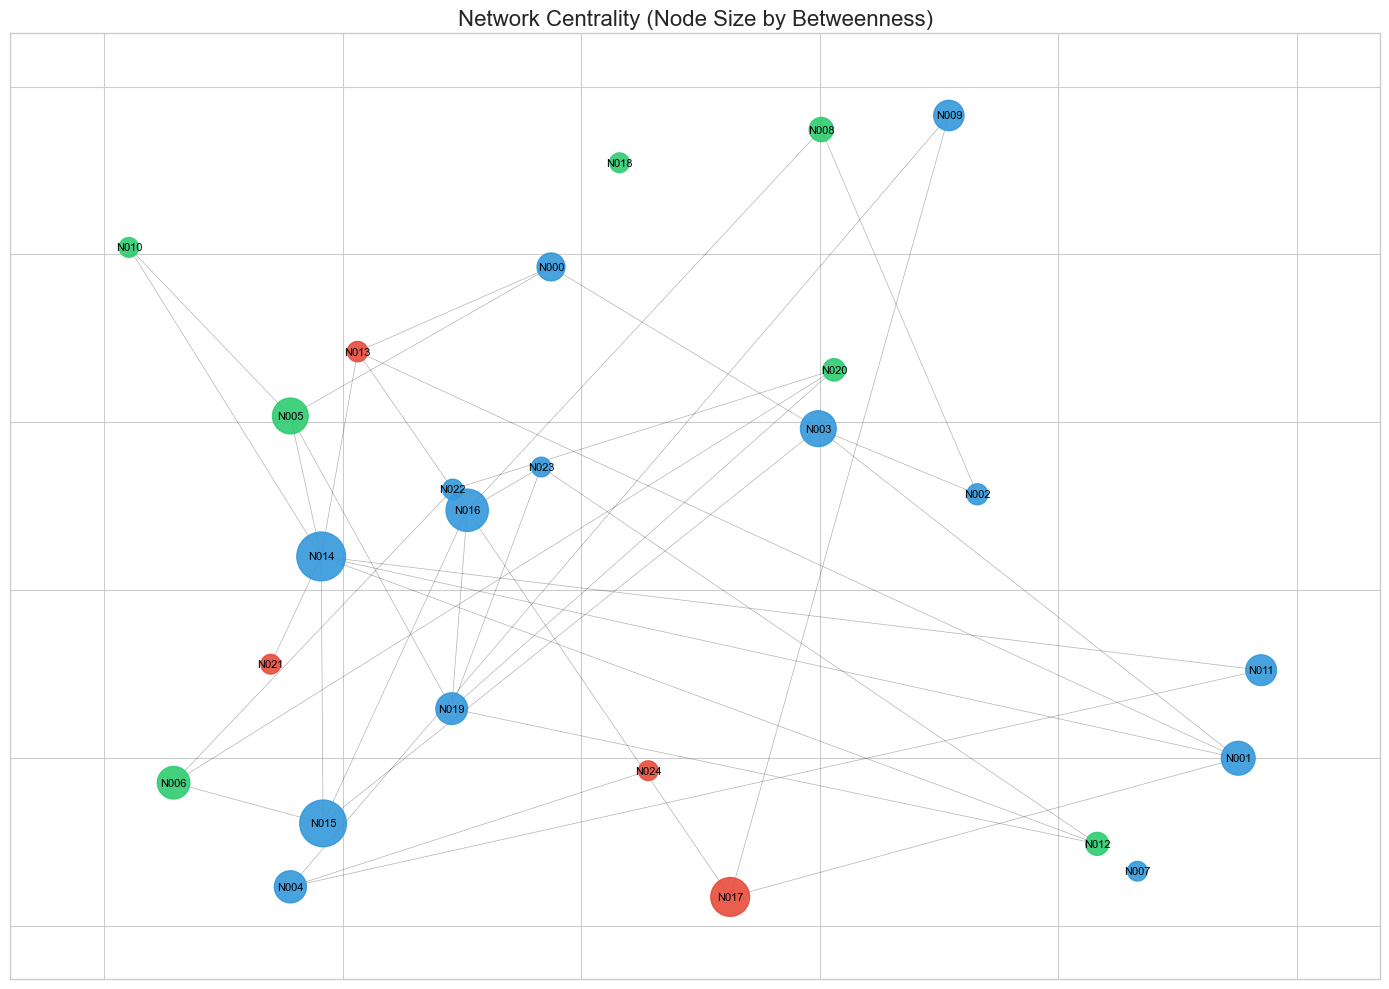

Centrality visualisation saved to outputs/01e_centrality_analysis/01e_centrality_visualisation.png


In [5]:
# --- Step 4: Visualize Centrality ---
# 203 # This cell creates a visualisation where node size is mapped to its
# 203 # betweenness centrality. This provides an intuitive visual representation
# 203 # of the network's most critical nodes, making the analysis easier to interpret.

def visualize_centrality(G: nx.Graph, file_path: Path):
    """Creates a graph plot with node sizes based on betweenness centrality."""
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 10))

    pos = nx.get_node_attributes(G, 'pos')
    kinds = nx.get_node_attributes(G, 'kind')
    betweenness = nx.get_node_attributes(G, 'betweenness_centrality')

    # 203 # Scale node sizes for better visual impact.
    # 203 # Iterate over G.nodes() to ensure the order of node_sizes
    # 203 # matches the order of nodes used by the drawing function.
    node_sizes = [200 + (betweenness.get(node, 0) * 4000) for node in G.nodes()]

    color_map = {'Clinic': '#3498db', 'Hospital': '#e74c3c', 'Warehouse': '#2ecc71'}
    node_colors = [color_map.get(kinds.get(node, ''), '#bdc3c7') for node in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9, ax=ax)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', ax=ax)

    ax.set_title("Network Centrality (Node Size by Betweenness)", fontsize=16)
    plt.tight_layout()
    fig.savefig(file_path, dpi=200)
    plt.show()
    print(f"Centrality visualisation saved to {file_path}")

# 203 # Execute the visualisation.
visualize_centrality(G, cfg.viz_file)

In [6]:
# --- Step 5: Export Augmented Graph ---
# 203 # This cell saves the updated graph, which now includes the centrality
# 203 # scores as node attributes, to a new GraphML file. This ensures that
# 203 # our analytical results are persisted for the next notebook in the series.

def export_augmented_graph(G: nx.Graph, file_path: Path):
    """Saves the graph with centrality attributes to a new GraphML file."""
    # 203 # Convert the 'pos' tuple back to a string for GraphML compatibility.
    G_export = G.copy()
    for node, data in G_export.nodes(data=True):
        if 'pos' in data and isinstance(data['pos'], tuple):
            data['pos'] = str(data['pos'])

    nx.write_graphml(G_export, file_path)
    print(f"Augmented graph with centrality scores saved to {file_path}")

# 203 # Execute the export.
export_augmented_graph(G, cfg.output_graph_file)

Augmented graph with centrality scores saved to outputs/01e_centrality_analysis/graph_with_centrality.graphml
